In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
%matplotlib inline

In [73]:
train= pd.read_csv("C:/Users/Vishal Parihar/OneDrive/Documents/Airline/ACT India D&A GCC_Data Scientist_Case/train.csv")

In [74]:
test= pd.read_csv("C:/Users/Vishal Parihar/OneDrive/Documents/Airline/ACT India D&A GCC_Data Scientist_Case/test.csv")

In [75]:
train.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [76]:
train.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [77]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [78]:
train.shape

(103904, 24)

In [79]:
train.drop(columns=['id'], axis=1, inplace=True)

In [80]:
train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [81]:
test.drop(columns=['Unnamed: 0','id'],axis=1, inplace=True)

In [82]:
test.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [83]:
train.columns=[col.replace(' ','_') for col in train.columns]

In [84]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [85]:
test.columns=[col.replace(' ','_') for col in test.columns]

In [86]:
test.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

### converting values of "satisfaction" columns in to 0 and 1

In [87]:
train['satisfaction'].replace({"satisfied":1,"neutral or dissatisfied":0},inplace=True)

In [88]:
test['satisfaction'].replace({"satisfied":1,"neutral or dissatisfied":0},inplace=True)

### Checkng and Handlling Missing Values-

In [89]:
train.isna().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [90]:
train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean(), inplace=True)

In [91]:
test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean(), inplace=True)

In [92]:
train.isna().sum() 

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [93]:
test.isna().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

### checking and handelling balanced and imbalanced data

In [94]:
train[train['satisfaction']==1]['satisfaction'].count()

45025

In [95]:
train[train['satisfaction']==0]['satisfaction'].count()

#it is a balanced data set

58879

#### Exploratory Data Ananlysis

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


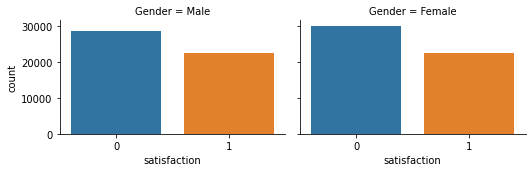

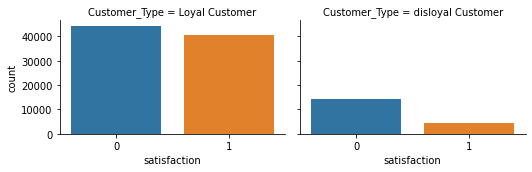

In [96]:
# Gender and Customer type
with sns.axes_style():
    g = sns.catplot("satisfaction", col="Gender", data=train, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer_Type", data=train, kind="count", height=2.5, aspect=1.5)

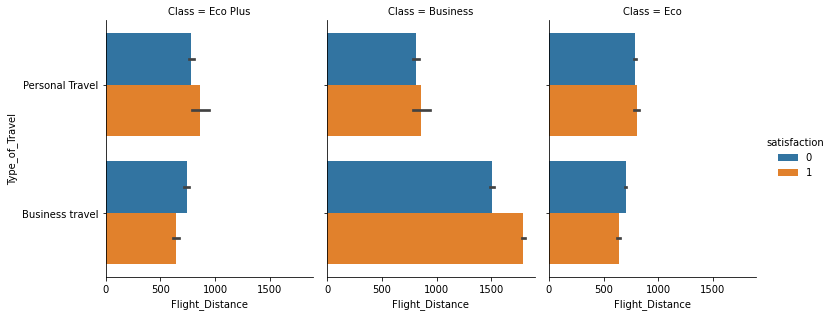

In [97]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style():
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


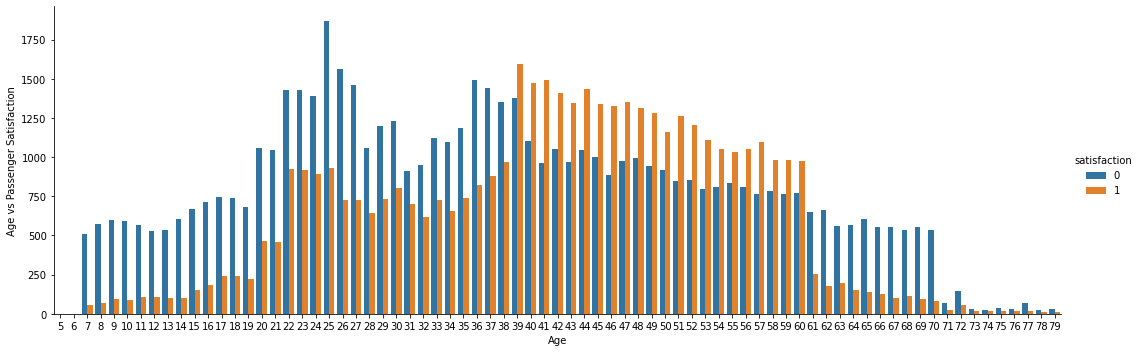

In [98]:
# Age
with sns.axes_style():
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

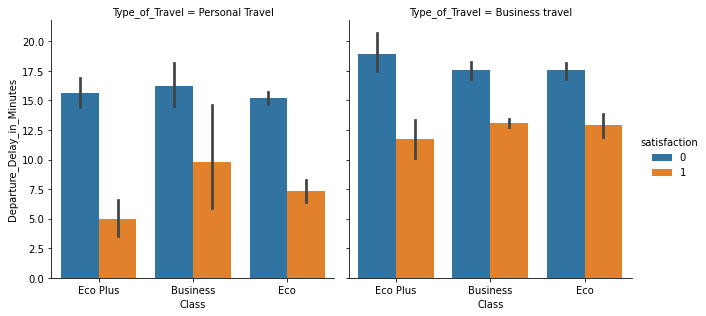

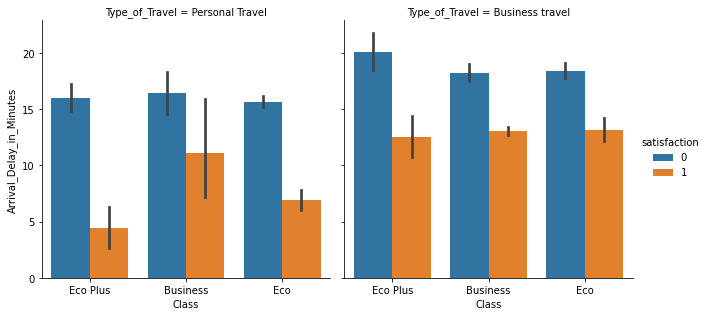

In [99]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style():
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)

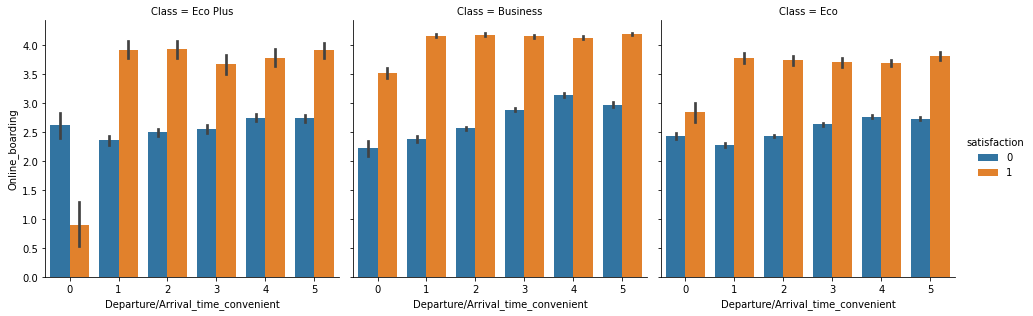

In [100]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style():
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

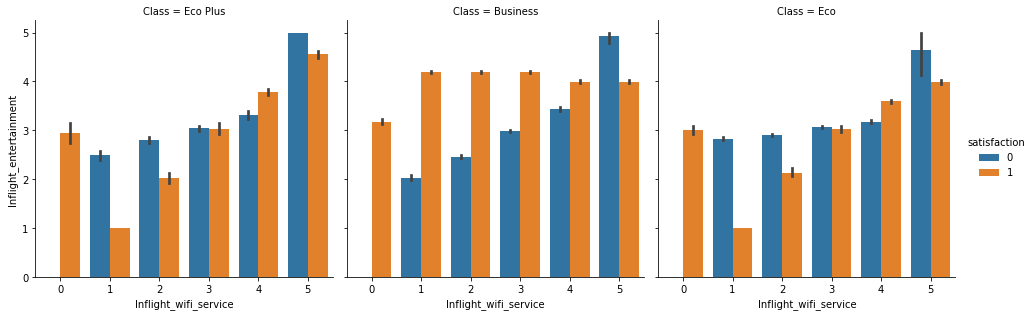

In [101]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style():
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


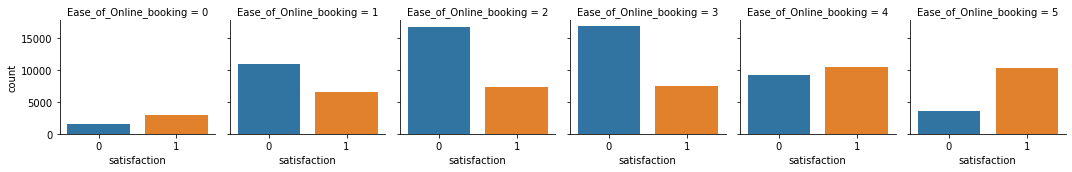

In [102]:
# Ease_of_Online_booking
with sns.axes_style():
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


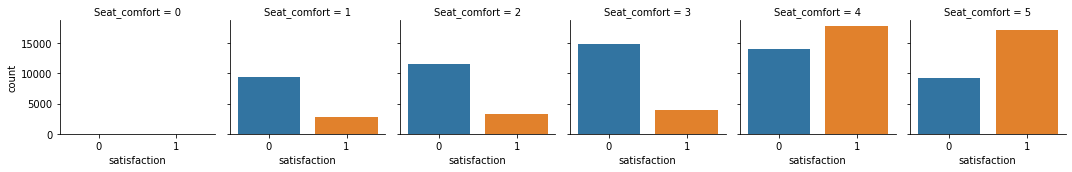

In [103]:
# Seat_comfort
with sns.axes_style():
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

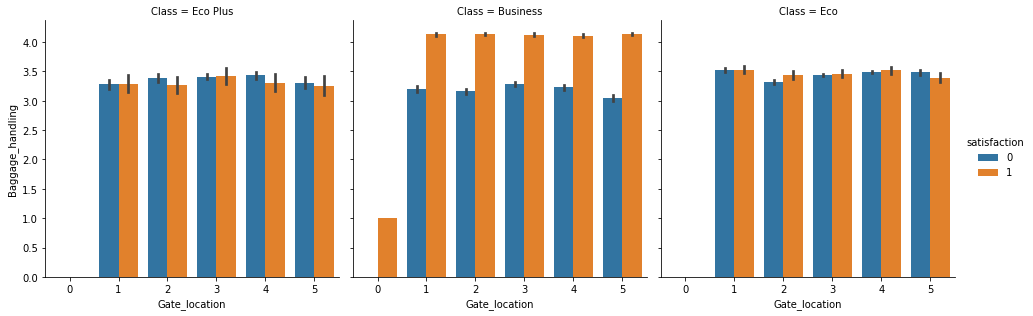

In [104]:
with sns.axes_style():
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

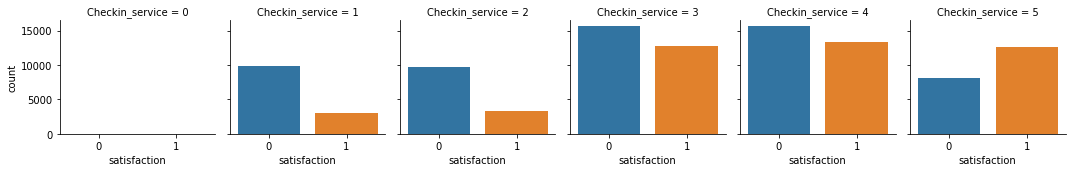

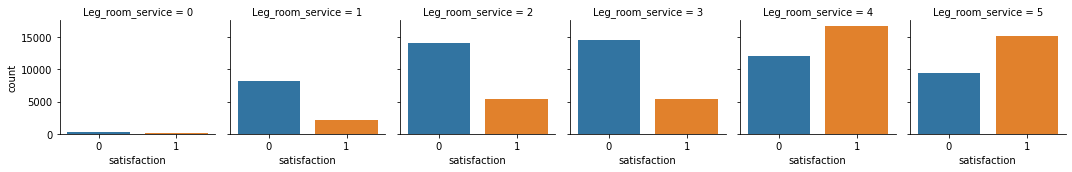

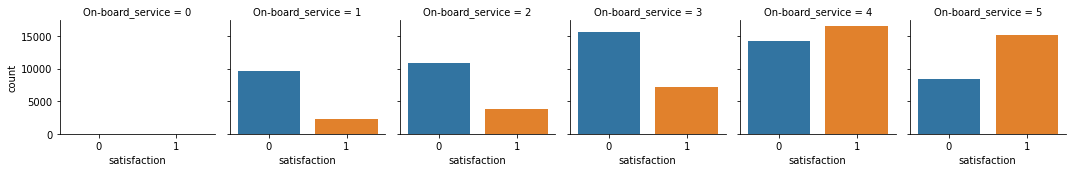

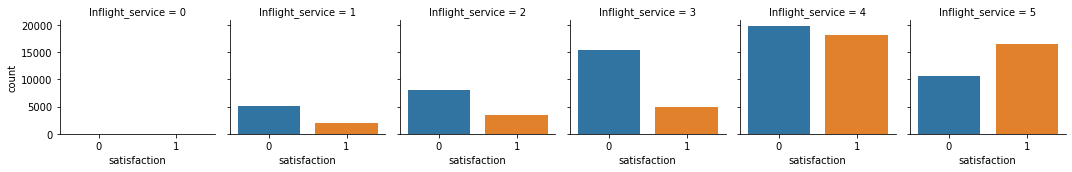

In [105]:
# Ease_of_Online_booking
with sns.axes_style():
    g = sns.catplot("satisfaction", col="Checkin_service", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g = sns.catplot("satisfaction", col="Leg_room_service", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g = sns.catplot("satisfaction", col="On-board_service", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g = sns.catplot("satisfaction", col="Inflight_service", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

In [106]:
### converting values of "Customer Type" columns in to 0 and 1
train['Customer_Type']=train['Customer_Type'].replace({"Loyal Customer":1,"disloyal Customer":0})

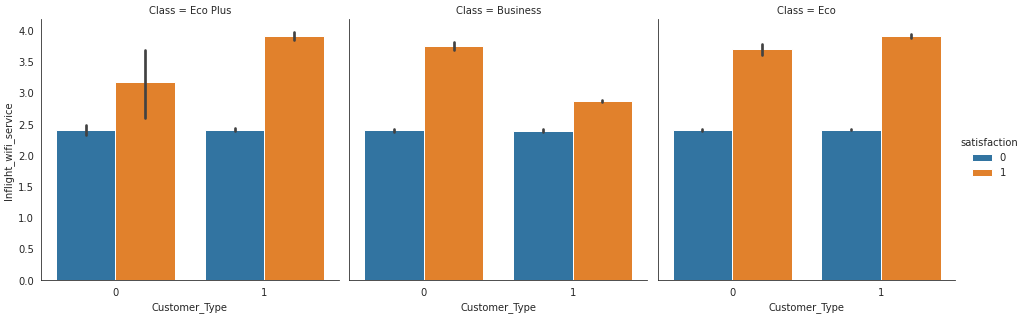

In [107]:
# finding threshold value of loyal customer for satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x="Customer_Type", y="Inflight_wifi_service", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


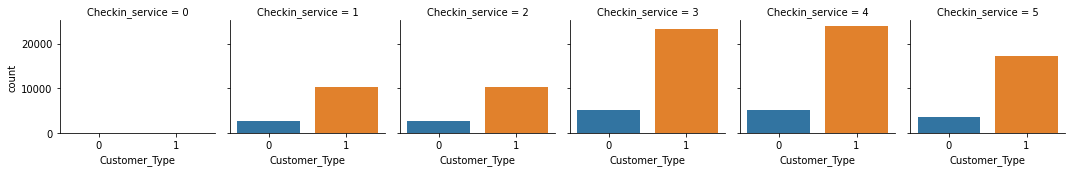

In [108]:
with sns.axes_style():
    g = sns.catplot("Customer_Type", col="Checkin_service", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

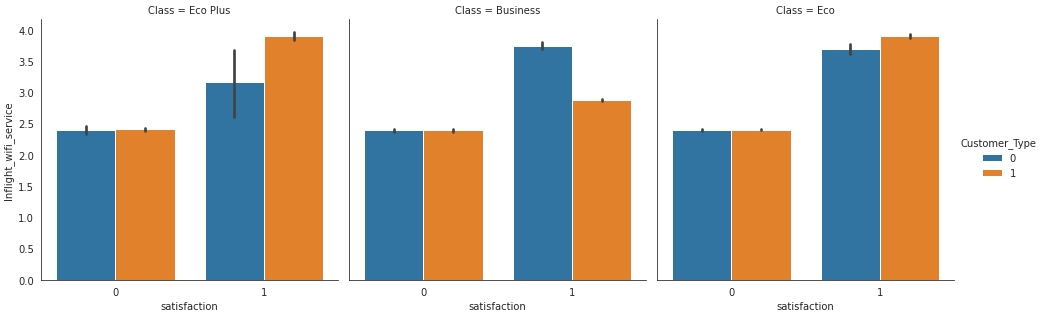

In [110]:
# finding threshold value of loyal customer for satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x="satisfaction", y="Inflight_wifi_service", hue="Customer_Type", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

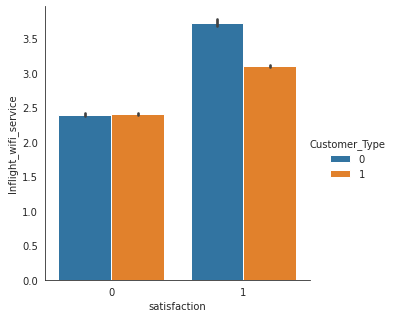

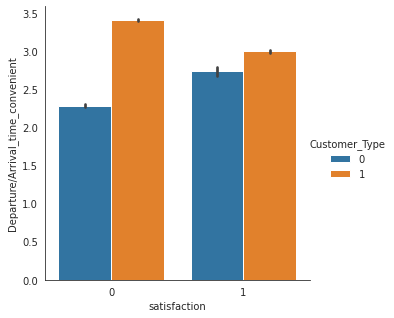

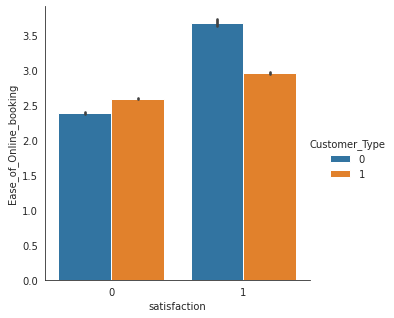

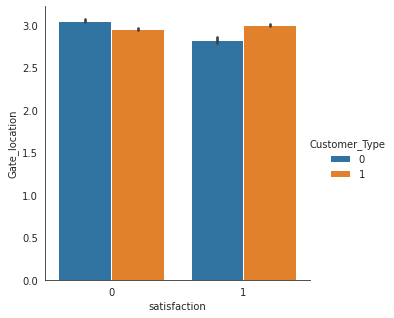

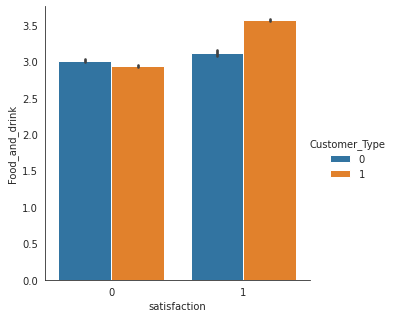

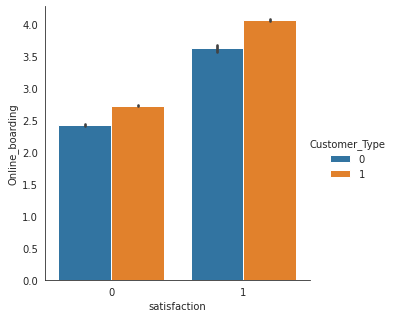

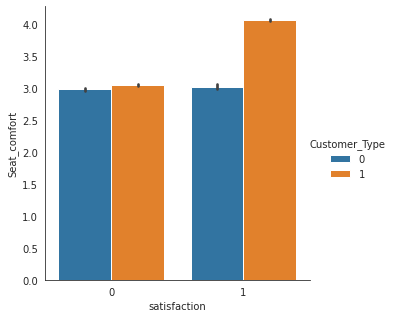

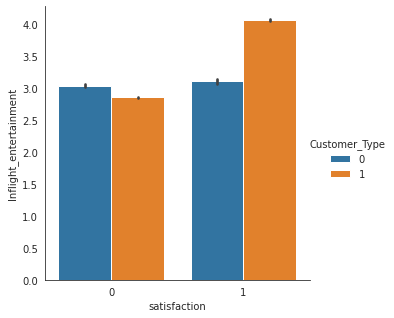

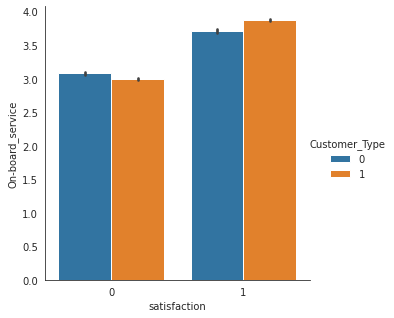

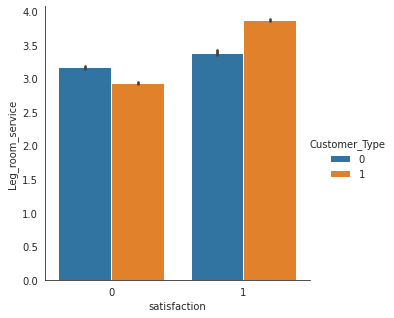

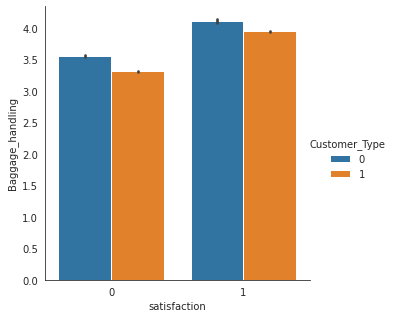

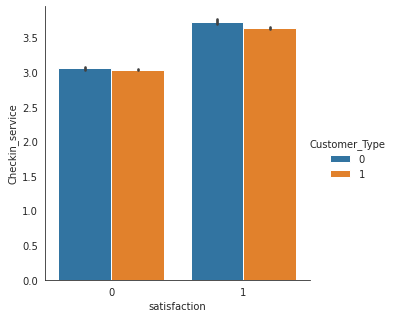

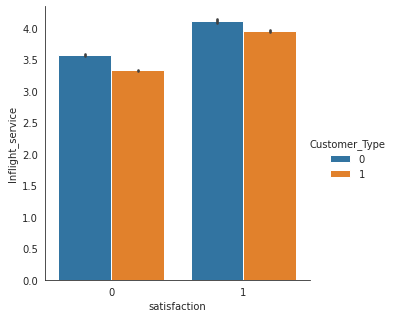

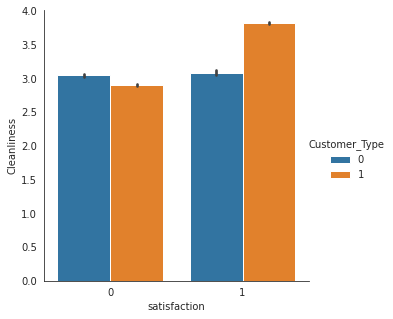

In [111]:
# finding threshold value of loyal customer for satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x="satisfaction", y="Inflight_wifi_service", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1)
    g = sns.catplot(x="satisfaction", y="Departure/Arrival_time_convenient", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Ease_of_Online_booking", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Gate_location", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Food_and_drink", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Online_boarding", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Seat_comfort", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Inflight_entertainment", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="On-board_service", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Leg_room_service", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Baggage_handling", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Checkin_service", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Inflight_service", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="satisfaction", y="Cleanliness", hue="Customer_Type", data=train, kind="bar", height=4.5, aspect=1.0)

In [70]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

#### label Encoding for object dtype columns

In [48]:
label_encoder = preprocessing.LabelEncoder()

In [49]:
# for train data
for i in range(len(train.columns)):
    if train[train.columns[i]].dtype =='O':
        train[train.columns[i]]=label_encoder.fit_transform(train[train.columns[i]])
    

In [50]:
# for test data
for i in range(len(test.columns)):
    if test[test.columns[i]].dtype =='O':
        test[test.columns[i]]=label_encoder.fit_transform(test[test.columns[i]])

#### Outlier detection and treatment

In [51]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [52]:
# treatment
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Correlation detection amoung independent var

In [53]:
corr = train.corr()

corr.style.background_gradient(cmap='coolwarm')

C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,1.000000,nan,0.003771,-0.002533,-0.000767,0.001958,0.005219,0.001929,-0.000598,0.002581,0.004012,-0.068355,-0.045077,0.004238,0.010482,0.037396,0.053330,0.007121,0.054667,-0.001769,0.002338,0.000861,0.003205
Customer_Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Age,0.003771,nan,1.000000,-0.165772,-0.113789,0.049941,0.020678,-0.045648,0.023055,0.001273,0.005523,0.211698,0.162962,0.062890,0.044691,0.036781,-0.055418,0.022439,-0.063103,0.049708,-0.010035,-0.013495,0.128637
Type_of_Travel,-0.002533,nan,-0.165772,1.000000,0.600387,-0.378089,-0.129288,0.264131,-0.155461,-0.040749,-0.107641,-0.370311,-0.242873,-0.257637,-0.102056,-0.207336,-0.036068,0.007305,-0.023850,-0.150307,-0.003095,-0.001796,-0.635755
Class,-0.000767,nan,-0.113789,0.600387,1.000000,-0.455142,-0.007898,0.161340,-0.088285,-0.020021,-0.093577,-0.358666,-0.277732,-0.235281,-0.200858,-0.230640,-0.137019,-0.092723,-0.128127,-0.167105,-0.007008,0.011236,-0.513447
Flight_Distance,0.001958,nan,0.049941,-0.378089,-0.455142,1.000000,0.011368,-0.099450,0.071310,0.015891,0.054553,0.211074,0.156086,0.129796,0.108560,0.145038,0.073305,0.052144,0.064118,0.098756,0.011341,-0.003519,0.305225
Inflight_wifi_service,0.005219,nan,0.020678,-0.129288,-0.007898,0.011368,1.000000,0.365687,0.702967,0.436460,0.129371,0.360294,0.130538,0.233671,0.115089,0.185240,0.109133,0.019715,0.101002,0.141447,-0.021858,-0.025353,0.254764
Departure/Arrival_time_convenient,0.001929,nan,-0.045648,0.264131,0.161340,-0.099450,0.365687,1.000000,0.442493,0.534221,-0.021648,-0.067825,-0.042975,-0.058678,0.056494,-0.016219,0.074947,0.082373,0.080671,-0.015962,-0.000942,-0.000906,-0.169169
Ease_of_Online_booking,-0.000598,nan,0.023055,-0.155461,-0.088285,0.071310,0.702967,0.442493,1.000000,0.537408,0.024442,0.316635,0.039191,0.064787,0.034526,0.135224,0.031849,-0.013818,0.029708,0.020341,-0.005188,-0.008803,0.140467
Gate_location,0.002581,nan,0.001273,-0.040749,-0.020021,0.015891,0.436460,0.534221,0.537408,1.000000,0.001104,0.011819,0.009348,0.010417,-0.015283,-0.000899,0.001649,-0.026070,0.003267,-0.002895,0.000441,0.000465,0.022789


In [54]:
# no as such mullti colinearity is present, only "Ease_of_Online_booking" -------->"Inflight_wifi_service" 
# and "Inflight_service" -----> "Baggage_handling"

## Feartures selection

#### Chi2 test

In [55]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
train_new = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
train_new.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [56]:
X=train_new[train_new.columns.difference(['satisfaction'])]

In [57]:
y=train_new[['satisfaction']]

In [58]:
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Class', 'Cleanliness', 'Flight_Distance', 'Inflight_entertainment',
       'Inflight_wifi_service', 'Leg_room_service', 'On-board_service',
       'Online_boarding', 'Seat_comfort', 'Type_of_Travel'],
      dtype='object')


#### Wrapper method

In [59]:
X=train[train.columns.difference(['satisfaction'])]

In [60]:
y=train['satisfaction']

In [61]:
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Class', 'Inflight_entertainment', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Type_of_Travel']
[0.02684702 0.00872365 0.0270131  0.02293574 0.09759783 0.03135807
 0.         0.02192733 0.00706984 0.02903002 0.03439913 0.01092023
 0.01394213 0.00397632 0.06991227 0.02443117 0.12052355 0.03663741
 0.02632317 0.13595868 0.06451129 0.18596205]


#### feature permutation

In [62]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2627 ± 0.0022,Type_of_Travel
0.1288 ± 0.0023,Inflight_wifi_service
0.0435 ± 0.0015,Online_boarding
0.0405 ± 0.0013,Seat_comfort
0.0350 ± 0.0014,Checkin_service
0.0318 ± 0.0014,Inflight_service
0.0273 ± 0.0006,Baggage_handling
0.0208 ± 0.0013,Cleanliness
0.0186 ± 0.0003,Class
0.0150 ± 0.0008,On-board_service


### Model Buiding

In [63]:
x= ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
y=['satisfaction']

In [64]:
# Split into test and train
X_train = train[x]
y_train = train[y].to_numpy()
X_test = test[x]
y_test = test[y].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [65]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

#### Using Random Forest ML algo

Accuracy = 0.8934016014782876
ROC Area under Curve = 0.8995779075547041
Time taken = 1.4972527027130127
              precision    recall  f1-score   support

           0    0.95611   0.84897   0.89936     14573
           1    0.83116   0.95019   0.88670     11403

    accuracy                        0.89340     25976
   macro avg    0.89363   0.89958   0.89303     25976
weighted avg    0.90126   0.89340   0.89380     25976



C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vishal Parihar\anaconda3\envs\alab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


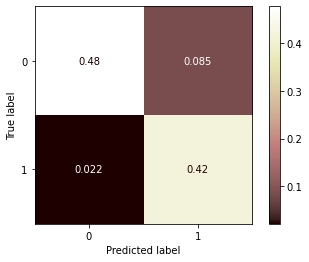

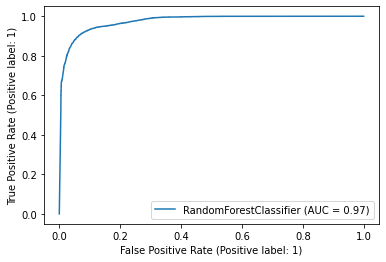

In [66]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 42,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

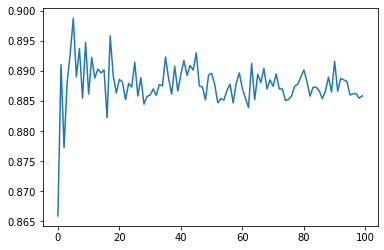

In [67]:

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)